In [11]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [12]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [13]:
tokenizer = Tokenizer()

data = open('erica_jong_2012_3.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'of': 2, 'and': 3, 'to': 4, 'i': 5, 'a': 6, 'in': 7, 'you': 8, 'my': 9, 'with': 10, 'is': 11, 'your': 12, 'that': 13, 'as': 14, 'for': 15, 'on': 16, 'we': 17, 'it': 18, 'are': 19, 'like': 20, 'not': 21, 'our': 22, 'love': 23, 'he': 24, 'me': 25, 'all': 26, 'but': 27, 'her': 28, 'have': 29, 'his': 30, 'will': 31, 'at': 32, 'be': 33, 'they': 34, 'this': 35, 'who': 36, 'or': 37, 'she': 38, 'from': 39, 'by': 40, 'their': 41, 'into': 42, 'life': 43, 'when': 44, 'if': 45, 'us': 46, 'its': 47, 'only': 48, 'out': 49, 'am': 50, 'was': 51, 'which': 52, 'one': 53, 'so': 54, 'no': 55, 'him': 56, 'blood': 57, 'up': 58, 'what': 59, 'eyes': 60, 'heart': 61, 'an': 62, 'world': 63, 'them': 64, 'other': 65, 'death': 66, 'do': 67, 'where': 68, 'through': 69, 'because': 70, 'can': 71, 'cannot': 72, 'were': 73, 'now': 74, 'little': 75, 'books': 76, 'there': 77, 'how': 78, 'too': 79, 'sea': 80, 'never': 81, 'even': 82, 'back': 83, 'would': 84, 'than': 85, 'has': 86, 'over': 87, 'body': 88, 'yet':

In [14]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=5, verbose=1)
#print model.summary()
print(model)


In [ ]:
model.save('erica_pg.model.h5')

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

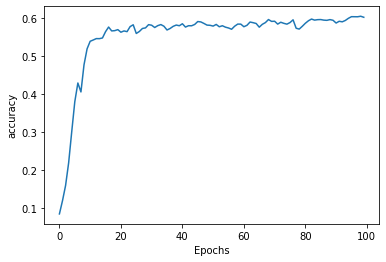

In [8]:
plot_graphs(history, 'accuracy')


In [10]:
seed_text = "You are my love"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

You are my love of ice love songs crooning like our modern my ' thing or narrow puzzles fan teasdale teasdale basement teasdale epics teasdale stamps puzzles life bottles wives ' ' blades between ' ' drowning cage sang trees between the leaked shrouds symmetry length length faces cities symmetry than the divide thinking in armor ' hunger for roses fidelity songs songs over mine ann justice slide teasdale knuckle ceiling in the present couches and confusion afterglow than roses ' always toddy californians wives than again from again gloat feathers again and again from the selves ' they weakness themselves amid the bubbles
